___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28)

(10000, 28, 28)

(60000,)

(10000,)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

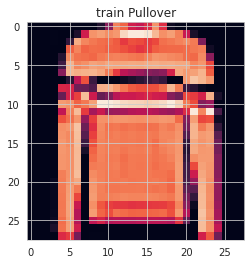

In [7]:
plt.imshow(x_train[5])
plt.title("train "+classes[y_train[5]]);

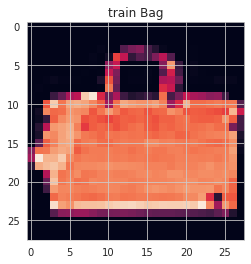

In [8]:
plt.imshow(x_train[99])
plt.title("train "+classes[y_train[99]]);

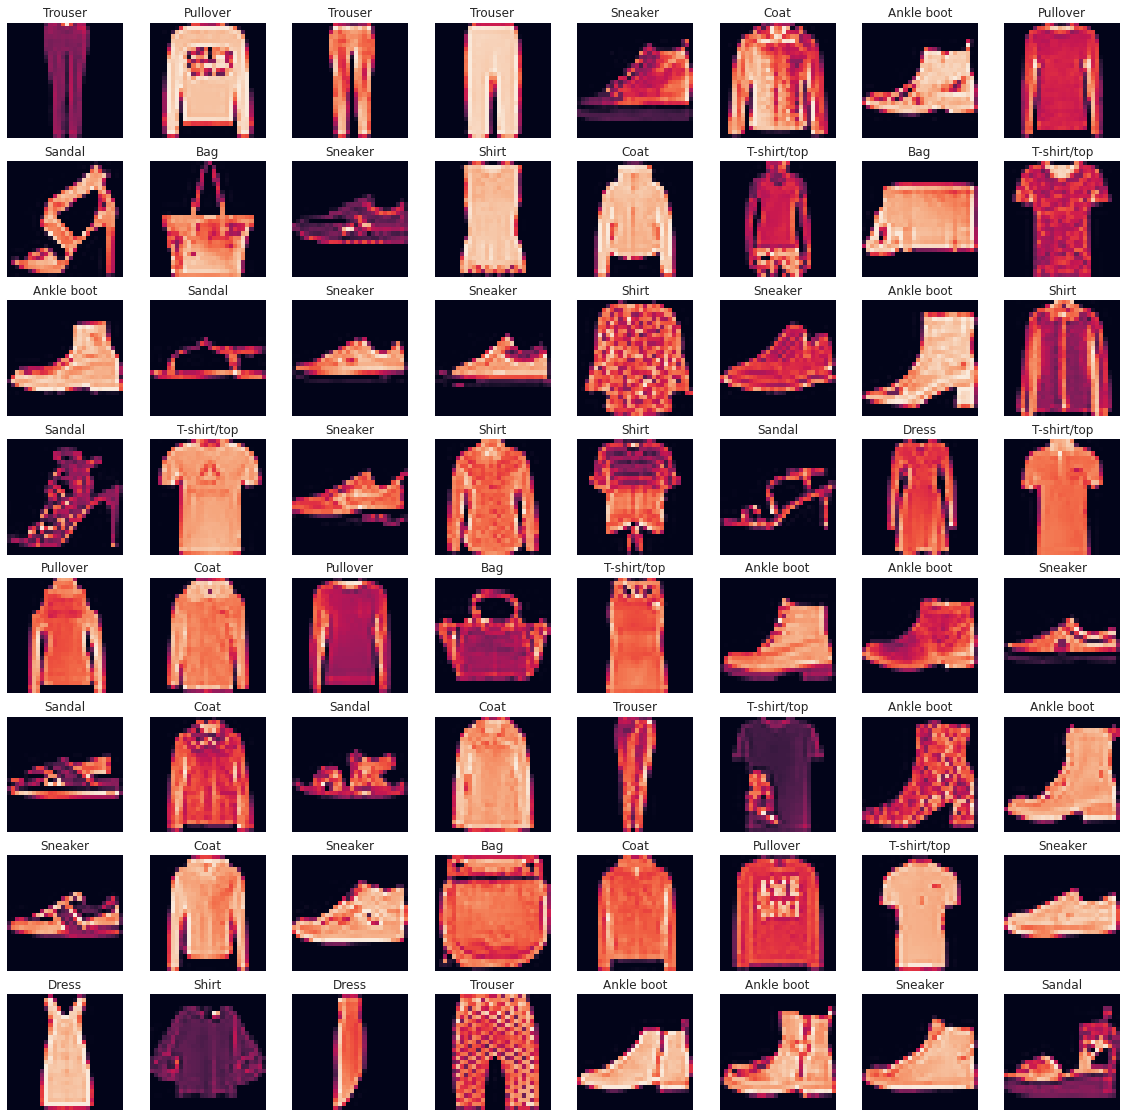

In [9]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [10]:
x_train.max()

255

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [12]:
display(x_train.shape, x_test.shape)

(60000, 28, 28)

(10000, 28, 28)

In [13]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)

In [16]:
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [22]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 20s 4ms/step - loss: 0.4083 - accuracy: 0.8511 - val_loss: 0.3117 - val_accuracy: 0.8886
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2661 - accuracy: 0.9033 - val_loss: 0.2762 - val_accuracy: 0.9013
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2309 - accuracy: 0.9160 - val_loss: 0.2526 - val_accuracy: 0.9107
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2115 - accuracy: 0.9233 - val_loss: 0.2650 - val_accuracy: 0.9069
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1974 - accuracy: 0.9282 - val_loss: 0.2630 - val_accuracy: 0.9080
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1897 - accuracy: 0.9320 - val_loss: 0.2584 - val_accuracy: 0.9120


**TASK 7: Plot values of metrics you used in your model.**

In [23]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.408,0.851,0.312,0.889
1,0.266,0.903,0.276,0.901
2,0.231,0.916,0.253,0.911
3,0.211,0.923,0.265,0.907
4,0.197,0.928,0.263,0.908


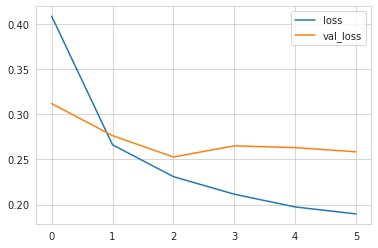

In [24]:
summary[["loss", "val_loss"]].plot();

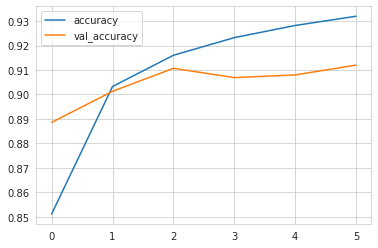

In [25]:
summary[["accuracy", "val_accuracy"]].plot();

**The model goes to overfitting but earlystopping stopped model in epoch 5**

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25262904167175293
Test accuracy: 0.9107000231742859


In [28]:
pred_prob = model.predict(X_test)

In [29]:
y_pred = np.argmax(pred_prob, axis=1)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.88      0.93      0.90      1000
           4       0.84      0.87      0.86      1000
           5       0.98      0.99      0.98      1000
           6       0.75      0.73      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [31]:
print(confusion_matrix(y_test, y_pred))

[[856   0  14  29   3   1  94   0   3   0]
 [  0 975   0  20   2   0   1   0   2   0]
 [ 11   1 862   7  49   0  70   0   0   0]
 [  6   1   9 925  33   0  24   0   2   0]
 [  1   0  63  22 867   0  47   0   0   0]
 [  0   0   0   0   0 991   0   8   0   1]
 [106   1  54  41  69   0 726   0   3   0]
 [  0   0   0   0   0  12   0 962   0  26]
 [  5   1   1   2   5   4   2   4 974   2]
 [  0   0   0   0   0   8   0  23   0 969]]


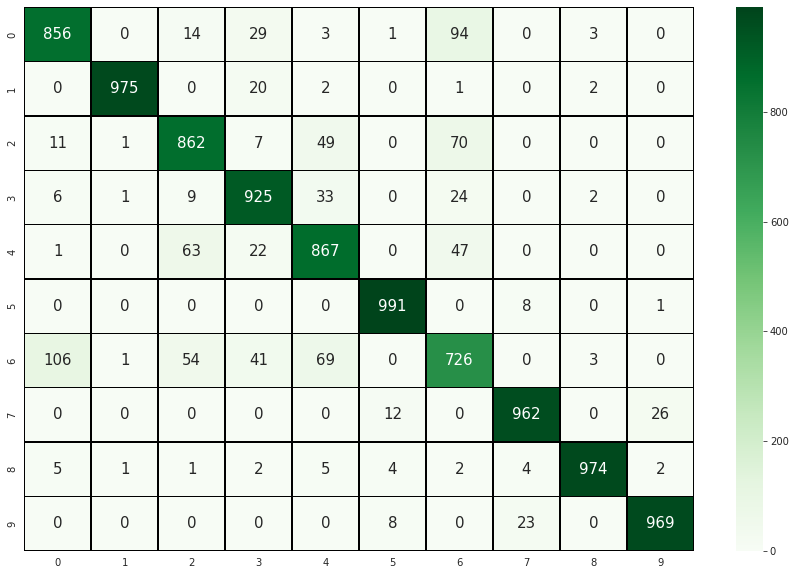

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Greens", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

**The main problem for the training is to detect shirts. Model confused shirts with 'T-shirt/top',"Pullover", "Coat".**

In [35]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Second Model with Drop out and Batch Normalization

In [36]:
from tensorflow.keras.layers import BatchNormalization

In [37]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))




model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [39]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 15s 7ms/step - loss: 0.8653 - accuracy: 0.6916 - val_loss: 0.4363 - val_accuracy: 0.8360
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4965 - accuracy: 0.8268 - val_loss: 0.5054 - val_accuracy: 0.8150
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4115 - accuracy: 0.8607 - val_loss: 0.2825 - val_accuracy: 0.9023
Epoch 4/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3717 - accuracy: 0.8744 - val_loss: 0.2854 - val_accuracy: 0.9000
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3495 - accuracy: 0.8824 - val_loss: 0.2562 - val_accuracy: 0.9102
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3296 - accuracy: 0.8898 - val_loss: 0.2474 - val_accuracy: 0.9093
Epoch 7/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3124 - accuracy: 0.8957 - val_loss: 0.2427 - val_ac

In [40]:
summary = pd.DataFrame(model.history.history)
summary.tail(10)

,loss,accuracy,val_loss,val_accuracy
12,0.261,0.912,0.212,0.927
13,0.254,0.915,0.209,0.928
14,0.249,0.916,0.214,0.925
15,0.247,0.917,0.219,0.926
16,0.241,0.918,0.203,0.932
17,0.239,0.919,0.210,0.927
18,0.235,0.921,0.198,0.931
19,0.229,0.922,0.207,0.929
20,0.225,0.923,0.205,0.926
21,0.224,0.925,0.204,0.932


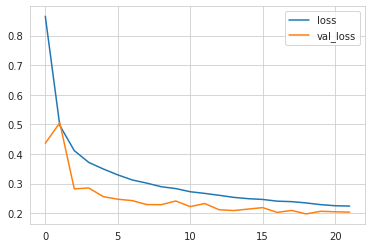

In [41]:
summary[["loss", "val_loss"]].plot();

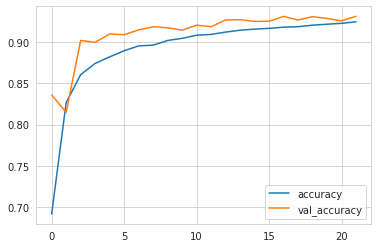

In [42]:
summary[["accuracy", "val_accuracy"]].plot();

**In the second model batch normalization and drop out was used. Besides adam optimiser was used instead of rmsprop. Accurancy scores increase 3% and there was no overfitting in the model.**

## Evaluation of Second Model on Test Data

In [43]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1978 - accuracy: 0.9312


[0.19777773320674896, 0.9312000274658203]

In [44]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19777773320674896
Test accuracy: 0.9312000274658203


In [45]:
pred_prob = model.predict(X_test)

In [46]:
y_pred = np.argmax(pred_prob, axis=1)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1000
           1       1.00      0.99      0.99      1000
           2       0.88      0.93      0.90      1000
           3       0.93      0.93      0.93      1000
           4       0.86      0.92      0.89      1000
           5       0.99      0.98      0.98      1000
           6       0.85      0.73      0.78      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



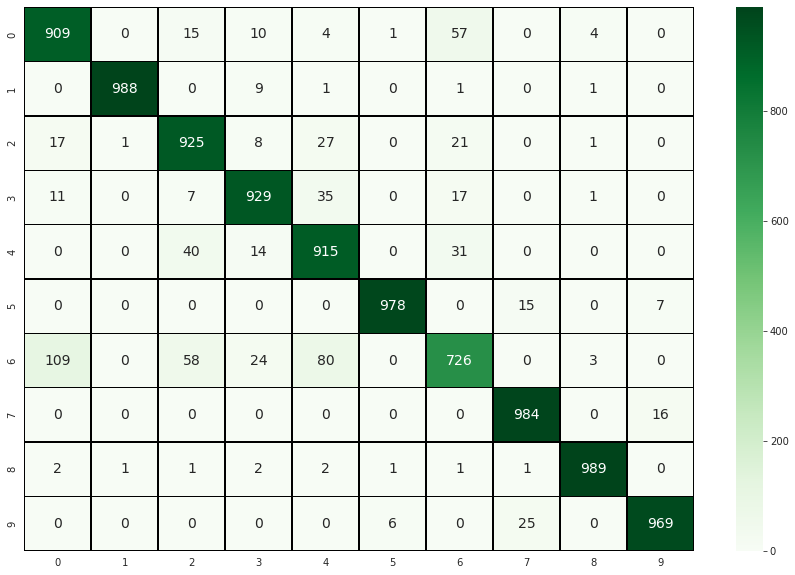

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Greens", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

**Scores of "shirt" class still low but higher than first model. (F1 score increased from 0.74 to 0.78) Scores of other classes increased also.** 

## Prediction

In [49]:
my_image = X_test[11]

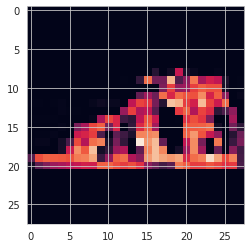

In [50]:
plt.imshow(my_image.reshape(28,28))

In [51]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [52]:
image_prediction

array([[8.0157776e-07, 9.5146014e-08, 5.0282193e-07, 1.7585268e-07,
        2.7671024e-07, 9.9900216e-01, 1.2450982e-06, 7.9823995e-04,
        1.2562418e-06, 1.9539225e-04]], dtype=float32)

In [53]:
result=np.argmax(image_prediction, axis=1)
result

array([5])

In [54]:
classes[int(result)]

'Sandal'

In [55]:
model.save("cnn-fashion.h5")

In [56]:
model=tf.keras.models.load_model('cnn-fashion.h5')

In [57]:
pred=model.predict(np.expand_dims(X_test[10],axis=0))

In [58]:
classes[np.argmax(pred)]

'Coat'

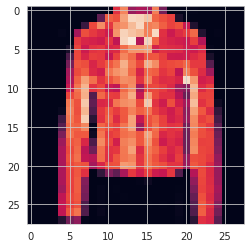

In [59]:
plt.imshow(X_test[10].reshape(28,28))

# End of Assignment